# Covid-19 Analysis
**Author:** Vyomkesh Vyas  
**Date Created:** 12th July 2025

This notebook depicts exploratory data analysis on covid datasets and world happiness report dataset. The aim of this notebook is to analyze correlations betweeen pandemic impact and happiness indicators such as GDP, life expectancy and social support.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We will begin our analysis by importing the covid and world happiness report datasets...

In [2]:
# Load the dataset
covid_cf = pd.read_csv('data/covid19_Confirmed_dataset.csv')
covid_dt = pd.read_csv('data/covid19_deaths_dataset.csv')
wwh_df = pd.read_csv('data/worldwide_happiness_report.csv')

### Analysis of covid confirmed cases data
Firstly, we will look into covid confirmed cases data. It contains 187 rows and 101 columns.

In [3]:
# Display the first few rows of the confirmed cases dataset
print(covid_cf.shape)
covid_cf.head()

(266, 104)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


We will drop the unnecessary columns and grouby Country to aggregate the confirmed cases.

In [4]:
# Drop unnecessary columns
covid_cf.drop(columns=['Lat', 'Long', 'Province/State'], inplace=True)

# Group by country and sum the cases
covid_cf.rename(columns={'Country/Region': 'Country'}, inplace=True)
covid_cf['Country'] = covid_cf['Country'].str.upper()
covid_cf = covid_cf.groupby('Country').sum()
covid_cf.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country,,,,,,,,,,,,,,,,,,,,,
AFGHANISTAN,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
ALBANIA,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
ALGERIA,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
ANDORRA,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
ANGOLA,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


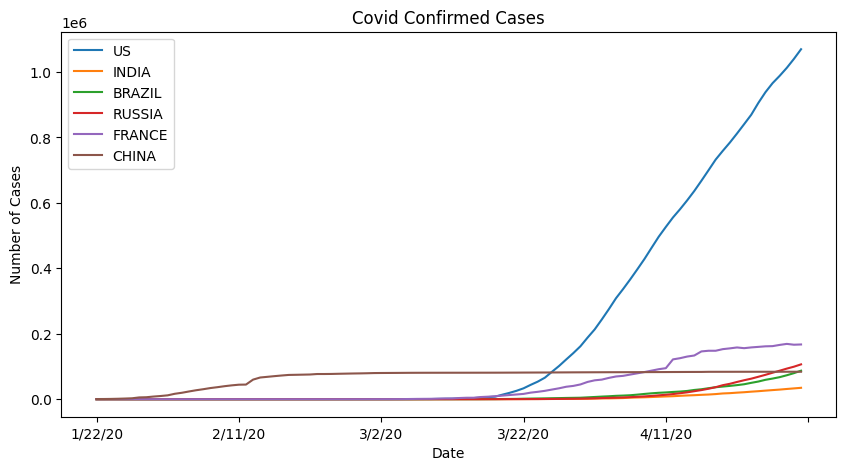

In [5]:
# Plot the confirmed cases for few countries
for i in ['US', 'INDIA', 'BRAZIL', 'RUSSIA', 'FRANCE','CHINA']:
    covid_cf.loc[i].plot(figsize=(10, 5), label=i, linestyle='-')
    plt.title('Covid Confirmed Cases')
    plt.xlabel('Date')
    plt.ylabel('Number of Cases')
    plt.legend()

Now, we need a single measure to represent the confirmed cases for each country, which will be used further to correlate with the world happiness data. So, we will calculate maximum rate of confirmed cases which shows maximum spike in confirmed cases within a day.

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Max_Confirm_Rate
Country,,,,,,,,,,,,,,,,,,,,,
AFGHANISTAN,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
ALBANIA,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
ALGERIA,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
ANDORRA,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
ANGOLA,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


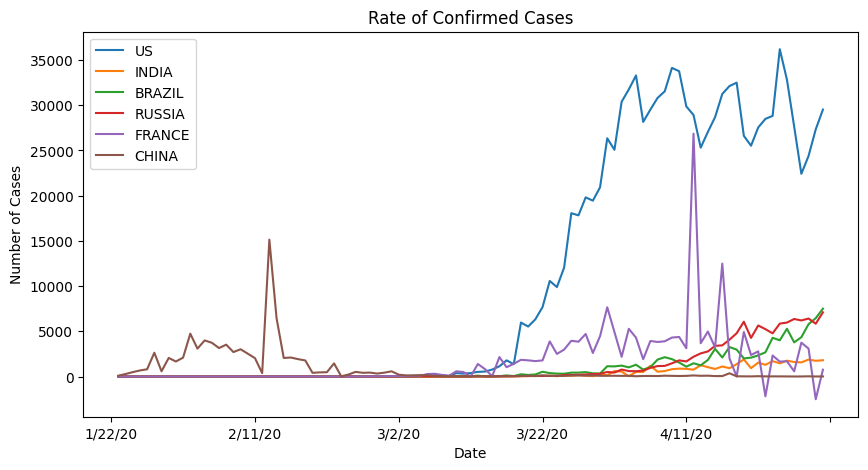

In [6]:
# Plot the rate of confirmed cases for few countries
for i in ['US', 'INDIA', 'BRAZIL', 'RUSSIA', 'FRANCE', 'CHINA']:
    covid_cf.loc[i].diff().plot(figsize=(10, 5), label=i, linestyle='-')
    plt.title('Rate of Confirmed Cases')
    plt.xlabel('Date')
    plt.ylabel('Number of Cases')
    plt.legend()

# Calculate the maximum rate of confirmed cases for each country
covid_cf['Max_Confirm_Rate'] = covid_cf.diff(axis=1).max(axis=1)
covid_cf.head()

### Analysis of covid deaths data
We will repeat similar steps for covid deaths dataset.

In [7]:
# Display the first few rows of the deaths dataset
print(covid_dt.shape)
covid_dt.head()

(266, 104)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [8]:
# Drop unnecessary columns
covid_dt.drop(columns=['Lat', 'Long', 'Province/State'], inplace=True)

# Group by country and sum the deaths
covid_dt.rename(columns={'Country/Region': 'Country'}, inplace=True)
covid_dt['Country'] = covid_dt['Country'].str.upper()
covid_dt = covid_dt.groupby('Country').sum()
covid_dt.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country,,,,,,,,,,,,,,,,,,,,,
AFGHANISTAN,0,0,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
ALBANIA,0,0,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
ALGERIA,0,0,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
ANDORRA,0,0,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
ANGOLA,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


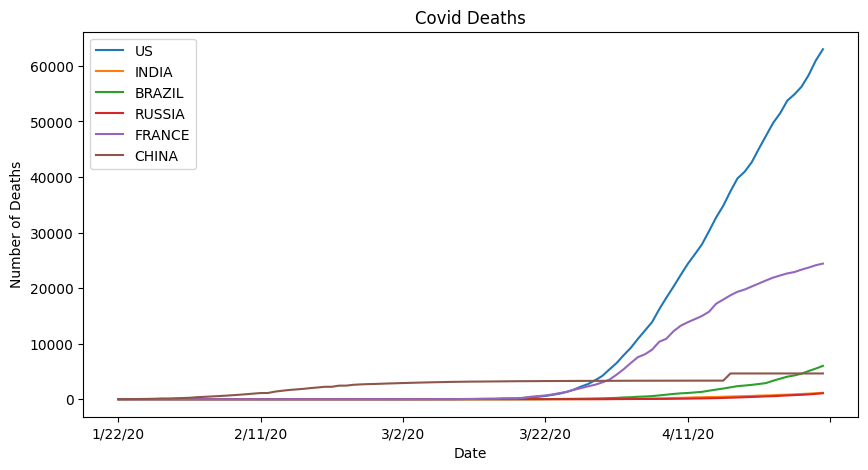

In [9]:
# Plot the deaths for few countries
for i in ['US', 'INDIA', 'BRAZIL', 'RUSSIA', 'FRANCE', 'CHINA']:
    covid_dt.loc[i].plot(figsize=(10, 5), label=i, linestyle='-')
    plt.title('Covid Deaths')
    plt.xlabel('Date')
    plt.ylabel('Number of Deaths')
    plt.legend()

C:\Users\asus\AppData\Local\Temp\ipykernel_9772\3837443921.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  covid_dt['Max_Death_Rate'].replace(0, 1, inplace=True)


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Max_Death_Rate
Country,,,,,,,,,,,,,,,,,,,,,
AFGHANISTAN,0,0,0,0,0,0,0,0,0,0,...,40,42,43,47,50,57,58,60,64,7.0
ALBANIA,0,0,0,0,0,0,0,0,0,0,...,27,27,27,27,28,28,30,30,31,4.0
ALGERIA,0,0,0,0,0,0,0,0,0,0,...,402,407,415,419,425,432,437,444,450,30.0
ANDORRA,0,0,0,0,0,0,0,0,0,0,...,37,37,40,40,40,40,41,42,42,4.0
ANGOLA,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2.0


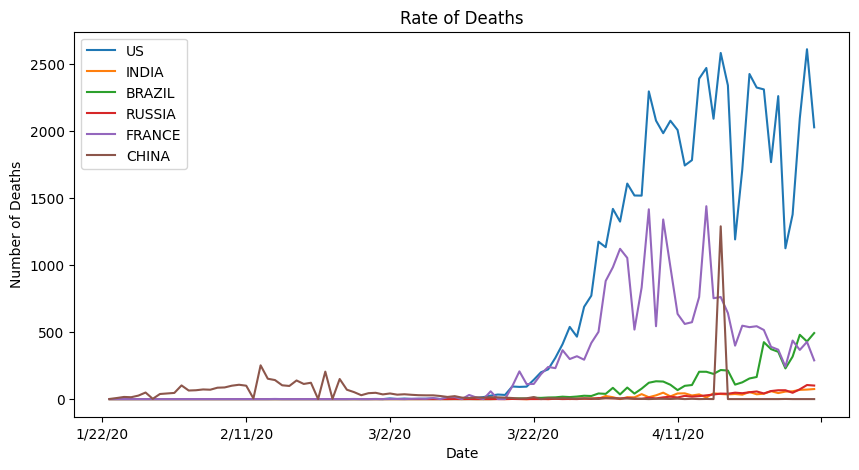

In [10]:
# Plot the rate of deaths for few countries
for i in ['US', 'INDIA', 'BRAZIL', 'RUSSIA', 'FRANCE', 'CHINA']:
    covid_dt.loc[i].diff().plot(figsize=(10, 5), label=i, linestyle='-')
    plt.title('Rate of Deaths')
    plt.xlabel('Date')
    plt.ylabel('Number of Deaths')
    plt.legend()

# Calculate the maximum rate of confirmed cases for each country
covid_dt['Max_Death_Rate'] = covid_dt.diff(axis=1).max(axis=1)
covid_dt['Max_Death_Rate'].replace(0, 1, inplace=True)
covid_dt.head()

### Analysis of combined data
Now we will look into world happiness report data and then we will merge it with covid data. The world happiness report data contains 156 rows and 9 columns.

In [11]:
# Display the first few rows of the worldwide happiness report dataset
print(wwh_df.shape)
wwh_df.head()

(156, 9)


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [12]:
# Drpp unnecessary columns
wwh_df.drop(columns=['Overall rank', 'Generosity', 'Freedom to make life choices', 'Perceptions of corruption'], inplace=True)

# Convert the 'Country name' column to uppercase
wwh_df.rename(columns={'Country or region': 'Country'}, inplace=True)
wwh_df.rename(columns={'Score': 'Happiness_Score'}, inplace=True)
wwh_df['Country'] = wwh_df['Country'].str.upper()
wwh_df.set_index('Country', inplace=True)
wwh_df.head()


,Happiness_Score,GDP per capita,Social support,Healthy life expectancy
Country,,,,
FINLAND,7.769,1.340,1.587,0.986
DENMARK,7.600,1.383,1.573,0.996
NORWAY,7.554,1.488,1.582,1.028
ICELAND,7.494,1.380,1.624,1.026
NETHERLANDS,7.488,1.396,1.522,0.999


We will calculate logarithm of max confirm rate and max death rate to bring them in the scale similar to the existing colums of world happiness data.

In [13]:
# Merging the datasets
wwh_df = wwh_df.join(covid_cf['Max_Confirm_Rate'], how='inner').join(covid_dt['Max_Death_Rate'], how='inner')

# Calculate the logarithm of the maximum confirm and death rates
wwh_df['Log_Max_Confirm_Rate'] = np.log(wwh_df['Max_Confirm_Rate'])
wwh_df['Log_Max_Death_Rate'] = np.log(wwh_df['Max_Death_Rate'])
wwh_df.head()

,Happiness_Score,GDP per capita,Social support,Healthy life expectancy,Max_Confirm_Rate,Max_Death_Rate,Log_Max_Confirm_Rate,Log_Max_Death_Rate
Country,,,,,,,,
FINLAND,7.769,1.340,1.587,0.986,267.0,43.0,5.587249,3.761200
DENMARK,7.600,1.383,1.573,0.996,391.0,22.0,5.968708,3.091042
NORWAY,7.554,1.488,1.582,1.028,386.0,16.0,5.955837,2.772589
ICELAND,7.494,1.380,1.624,1.026,99.0,5.0,4.595120,1.609438
NETHERLANDS,7.488,1.396,1.522,0.999,1346.0,234.0,7.204893,5.455321


Following insights can be drawn from the correlation heatmap:  
- Happiness Score has a strong positive correaltion with the GDP per capita, Social Support and Healthy life expecatancy.  
- Max Confirm Rate has a strong positive correlation with Max Death Rate.  
- Log Max Confirm Rate has a strong positive correlation with Log Max Death Rate.  
- Log Max Confirm Rate has a positive correlation with the Happiness Score, GDP per capita, Social Support and Healthy life expectancy.  
- Log Max Death Rate has slightly lower correlation with the world happiness columns as compared to the Log Max Confirm Rate.  

<Axes: >

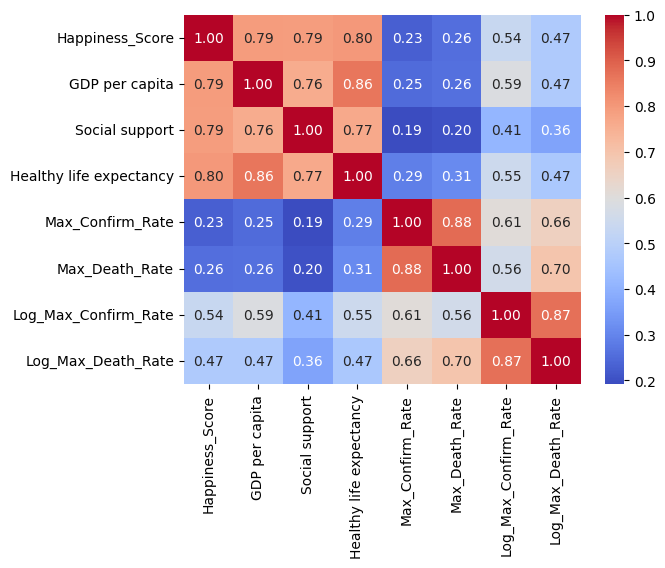

In [14]:
# Plot the correlation heatmap
sns.heatmap(wwh_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

Now we will plot the regression plot for log max confirm rate and log max death rate against the happiness data columns...

<Axes: xlabel='GDP per capita', ylabel='Log_Max_Confirm_Rate'>

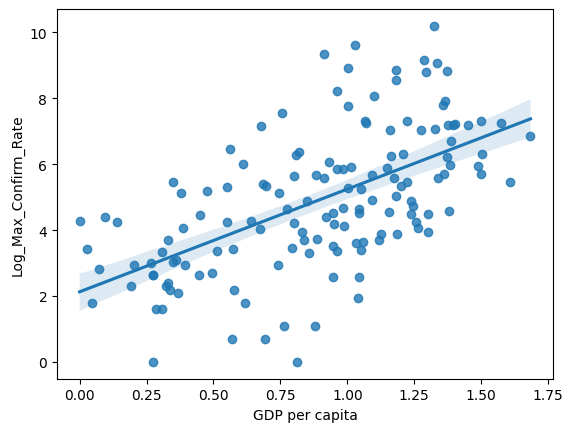

In [15]:
# Plot the regression plot for GDP per capita vs Log Max Confirm Rate
sns.regplot(x='GDP per capita', y='Log_Max_Confirm_Rate', data=wwh_df)

<Axes: xlabel='Social support', ylabel='Log_Max_Confirm_Rate'>

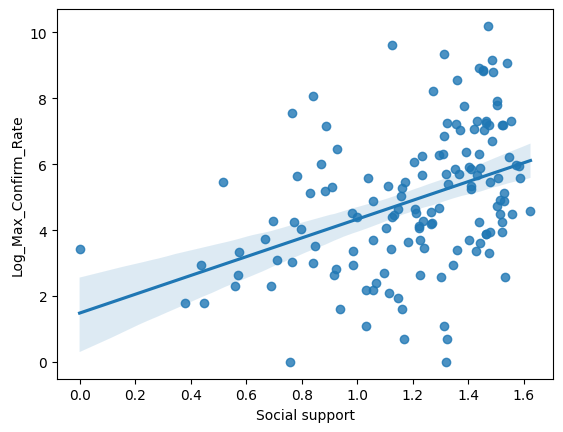

In [16]:
# Plot the regression plot for Social support vs Log Max Confirm Rate
sns.regplot(x='Social support', y='Log_Max_Confirm_Rate', data=wwh_df)

<Axes: xlabel='Healthy life expectancy', ylabel='Log_Max_Confirm_Rate'>

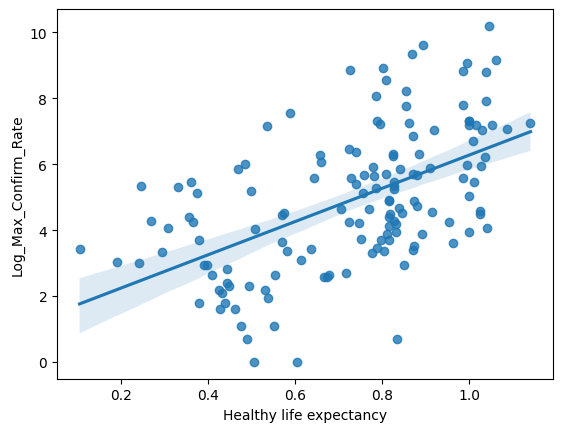

In [17]:
# Plot the regression plot for Healthy life expectancy vs Log Max Confirm Rate
sns.regplot(x='Healthy life expectancy', y='Log_Max_Confirm_Rate', data=wwh_df)

<Axes: xlabel='Happiness_Score', ylabel='Log_Max_Confirm_Rate'>

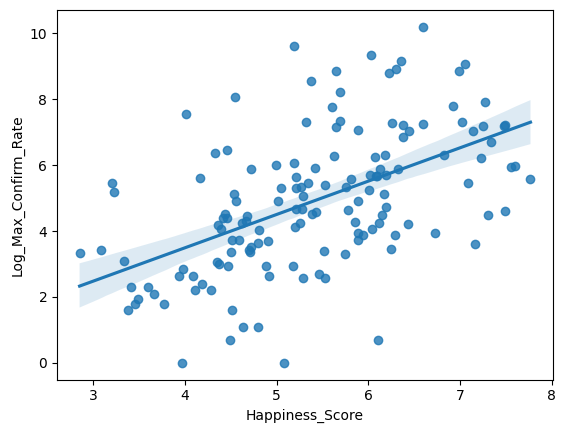

In [18]:
# Plot the regression plot for Happiness Score vs Log Max Confirm Rate
sns.regplot(x='Happiness_Score', y='Log_Max_Confirm_Rate', data=wwh_df)

<Axes: xlabel='GDP per capita', ylabel='Log_Max_Death_Rate'>

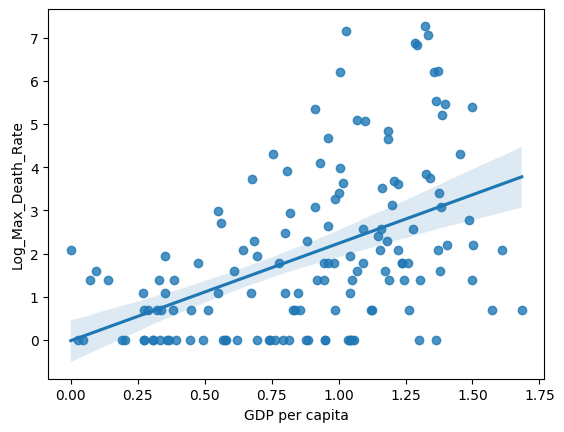

In [19]:
# Plot the regression plot for GDP per capita vs Log Max Death Rate
sns.regplot(x='GDP per capita', y='Log_Max_Death_Rate', data=wwh_df, dropna=True)

<Axes: xlabel='Healthy life expectancy', ylabel='Log_Max_Death_Rate'>

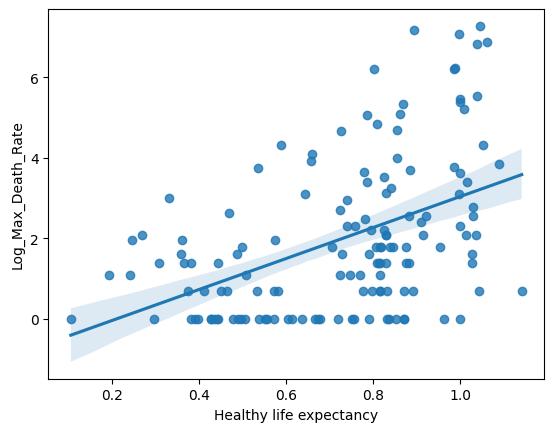

In [20]:
# Plot the regression plot for Healthy life expectancy vs Log Max Death Rate
sns.regplot(x='Healthy life expectancy', y='Log_Max_Death_Rate', data=wwh_df)

<Axes: xlabel='Social support', ylabel='Log_Max_Death_Rate'>

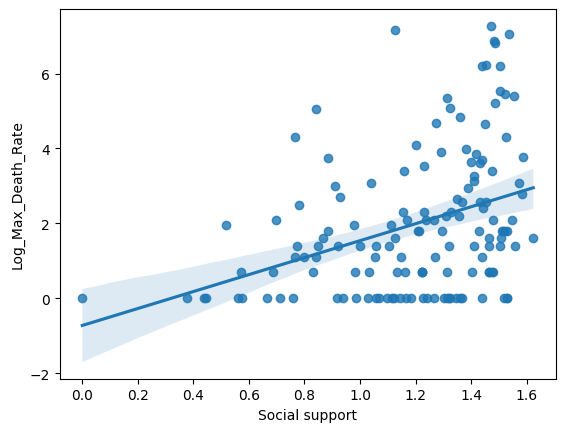

In [21]:
# Plot the regression plot for Social Support vs Log Max Death Rate
sns.regplot(x='Social support', y='Log_Max_Death_Rate', data=wwh_df)

<Axes: xlabel='Happiness_Score', ylabel='Log_Max_Death_Rate'>

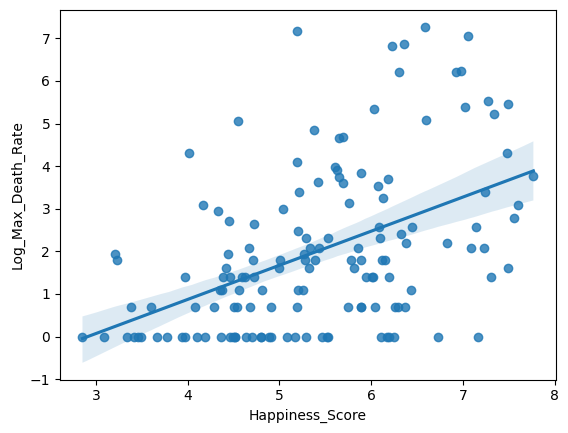

In [22]:
# Plot the regression plot for Happiness Score vs Log Max Death Rate
sns.regplot(x='Happiness_Score', y='Log_Max_Death_Rate', data=wwh_df)

## Conclusion:
In all the above plots it is clear that the rate of covid confirmed cases and covid deaths has a positive correlation with the happiness score as well as the features assosciated with it. Thus, w have enough evidence to conclude that happier countries tend to have higher rate of covid confirmed cases and deaths.  